# Linear Regression

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
hubble =pd.read_csv('hubble.csv', sep =',')

In [4]:
hubble.head()

,galaxy,distance,velocity
0,S.Mag,0.032,170
1,L.Mag,0.034,290
2,NGC.6822,0.214,-130
3,NGC.598,0.263,-70
4,NGC.221,0.275,-185


Text(0, 0.5, 'velocity')

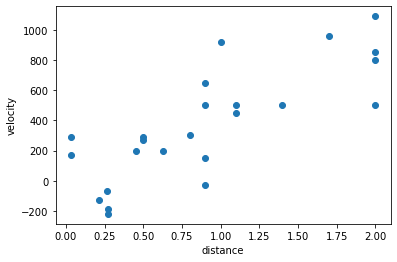

In [6]:
x=hubble['distance'].to_numpy()
y=hubble['velocity'].to_numpy()
#plot(x,y,'ro',markersize=5)
scatter(x,y)
xlabel("distance")
ylabel("velocity")


In [7]:
def compute_lin_reg(x,y):
    x_bar=mean(x)
    y_bar=mean(y)
    sxx=sum((x-x_bar)**2)
    sxy=sum((x-x_bar)*(y-y_bar))
    b1=sxy/sxx
    b0=y_bar - b1*x_bar
    return b0,b1


In [8]:
b0,b1=compute_lin_reg(x,y)

In [9]:
print(b0,b1)

-40.783649095860426 454.1584409226284


Text(0, 0.5, 'velocity')

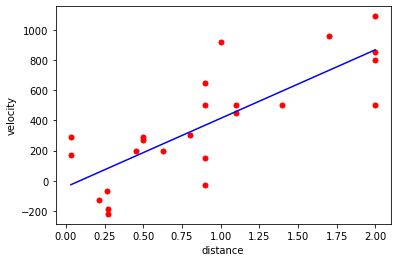

In [10]:
plot(x,y,'ro',markersize=5)
plot(x,b0+b1*x,'b-',markersize=30)
xlabel("distance")
ylabel("velocity")


In [11]:
b1,b0=polyfit(x,y,1) # fits a polynomial of degree n ( 3rd argument )
print(b0,b1)

-40.783649095860504 454.1584409226282


In [12]:
d,a,b,c=polyfit(x,y,3)
b=d*(x**3)+a*(x**2)+b*x+c

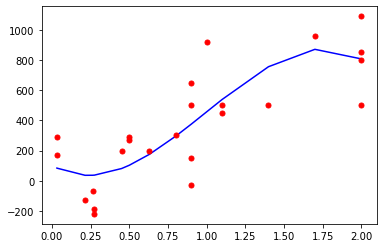

In [13]:
plot(x,b,'b-')
plot(x,y,'ro',markersize=5)

In [44]:
def compute_R2(x,y):
    b0,b1=compute_lin_reg(x,y)
    x_bar=mean(x)
    y_bar=mean(y)
    y_hat=b0+b1*x
    SSR=sum((y_hat-y_bar)**2)
    SST=sum((y-y_bar)**2)
    return SSR/SST
    


In [45]:
compute_R2(x,y)

0.6235305209067517

0.62 is closer to 1 but by a very small margin thus linear fit is a very bad fit

In [46]:

def compute_R2_3(x,y):
    d,a,b,c=polyfit(x,y,3)
    y_hat=d*(x**3)+a*(x**2)+b*x+c
    x_bar=mean(x)
    y_bar=mean(y)
    
    SSR=sum((y_hat-y_bar)**2)
    SST=sum((y-y_bar)**2)
    return SSR/SST

In [47]:
compute_R2_3(x,y)

0.6649663493592186

# Statistical inference of Linear regression

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
import seaborn as sns
import pandas as pd
hubble =pd.read_csv('hubble.csv', sep =',')

In [2]:
hubble.head()

,galaxy,distance,velocity
0,S.Mag,0.032,170
1,L.Mag,0.034,290
2,NGC.6822,0.214,-130
3,NGC.598,0.263,-70
4,NGC.221,0.275,-185


In [4]:
def compute_lin_reg(x,y):
    x_bar=mean(x)
    y_bar=mean(y)
    sxx=sum((x-x_bar)**2)
    sxy=sum((x-x_bar)*(y-y_bar))
    b1=sxy/sxx
    b0=y_bar - b1*x_bar
    return b0,b1,sxx


In [5]:
x=hubble['distance'].to_numpy()
y=hubble['velocity'].to_numpy()

In [6]:
compute_lin_reg(x,y)

(-40.783649095860426, 454.1584409226284, 9.583289624999999)

In [10]:
def compute_S(x,y):
    b0,b1,s=compute_lin_reg(x,y)
    y_bar=mean(y)
    y_hat=b0+b1*x
    SSR=sum((y_hat-y)**2)
    return SSR/(len(x)-2)
    

In [18]:
S= sqrt(compute_S(x,y))
S

232.9106701830066

In [15]:
import scipy.stats as stats
t95=stats.t.ppf(1-0.025,df=len(x)-2)
t95

2.0738730679040147

In [19]:
b0,b1,sxx=compute_lin_reg(x,y)

In [21]:
b1_lo=b1- S*t95/sqrt(sxx)
b1_hi=b1+ S*t95/sqrt(sxx)
b1_lo,b1_hi

(298.1262344360773, 610.1906474091795)

we got a confidence interval which is humungous interval that too for 95% CI

### Hypothesis testing
H0 : $\beta_1 $ is zero ie y is not increasing with x <br>
$H_{A}$ : $\beta_1 $ is zero ie y is not increasing with x 

$$ T = \frac{B_1 - \beta_1} {\frac{S}{\sqrt{S_{xx}}} }$$

and we need assuming $\beta_1$ = 0 the p value such that $\mathbb{P}(t > T)$ to be less that 0.05 ( our choice)

In [23]:
T = b1*sqrt(sxx)/S
T

6.0363624946359895

In [ ]:
p_val = 